# World Happiness Analysis
## Brannon Seay, 2021-07-01

## Table of Content
<ul>
<li><a href="#intro"> Introduction and Questions</a></li>   
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 2021 World Happiness Report survey of the state of global happiness.
>
> Dataset downloaded from Kaggle: [Ajaypal Singh](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021) who sourced the ["World Happiness Report"](https://worldhappiness.report/)
>
> From Ajaypal's description of the data on Kaggle:
>>**Context:** The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
>>
>>**Content:** The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.
>
> Questions to be explored and hopefully(!) answered include:
>> 1. What countries/regions are happiest?
>> 2. What parameters correlate most positively/negatively with happiness?
>> 3. How'd COVID impact happiness around the world?
>> 4. Can we build a model that predicts happiness using supervised ML?


In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gdp
from fuzzywuzzy import process, fuzz
%matplotlib inline

C:\Users\SEAY\Anaconda3\envs\geo_env\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


<a id='wrangling'></a>
## Data Wrangling

<a id='gather'></a>
### Gather

In [2]:
# Data directly downloaded from Kaggle. Import here:
# 2021 dataset
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
# Historical dataset
df_ts = pd.read_csv('world-happiness-report.csv')
df_ts.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


<a id='assess'></a>
### Assess

In [4]:
print(df.shape)
df.info()

(149, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Gene

In [5]:
print(df_ts.shape)
df_ts.info()

(1949, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB

#### In cleaning stage, will want to remove spaces, colons, and + symbols in column names and make all characters lowercase.

In [6]:
# All datatypes look accurate. No missing data in df, while we do have some NaNs in df_ts. Let's take a look at the NaN rows
df_ts[df_ts.isnull().any(axis=1)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377
66,Australia,2005,7.341,10.659,0.968,71.40,0.935,NaN,0.390,0.843,0.238
110,Bahrain,2012,5.027,10.716,0.911,66.86,0.682,NaN,0.438,0.589,0.381
...,...,...,...,...,...,...,...,...,...,...,...
1908,Yemen,2007,4.477,8.214,0.825,53.40,0.673,0.011,NaN,0.592,0.379
1916,Yemen,2016,3.826,7.715,0.775,55.10,0.533,-0.151,NaN,0.469,0.228
1917,Yemen,2017,3.254,7.578,0.790,55.90,0.595,-0.147,NaN,0.455,0.295
1918,Yemen,2018,3.058,NaN,0.789,56.70,0.553,NaN,0.793,0.461,0.315


In [7]:
'There are {} rows of data, making up {}% of the total rows, with at least one missing value'.format(df_ts[df_ts.isnull().any(axis=1)].shape[0],df_ts[df_ts.isnull().any(axis=1)].shape[0]/df_ts.shape[0]*100)

'There are 241 rows of data, making up 12.365315546434068% of the total rows, with at least one missing value'

In [8]:
# Missing data more prevelant in a given year?
df_ts[df_ts.isnull().any(axis=1)].groupby('year').year.count()

year
2005    26
2006    15
2007     8
2008     9
2009     8
2010    12
2011    14
2012    21
2013    13
2014    18
2015    16
2016    18
2017    15
2018    16
2019    18
2020    14
Name: year, dtype: int64

In [9]:
# Pretty uniform in missing data per year.

<a id='clean'></a>
### Clean

In [10]:
# Replace spaces, colons, and + in column names with underscores using .str.replace() and make all characters lowercase w/ .lower()
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace(':','')
df.columns = df.columns.str.replace('+','')
df.columns = df.columns.str.lower()
print(df.info())
df_ts.columns = df_ts.columns.str.replace(' ','_')
df_ts.columns = df_ts.columns.str.lower()
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country_name                               149 non-null    object 
 1   regional_indicator                         149 non-null    object 
 2   ladder_score                               149 non-null    float64
 3   standard_error_of_ladder_score             149 non-null    float64
 4   upperwhisker                               149 non-null    float64
 5   lowerwhisker                               149 non-null    float64
 6   logged_gdp_per_capita                      149 non-null    float64
 7   social_support                             149 non-null    float64
 8   healthy_life_expectancy                    149 non-null    float64
 9   freedom_to_make_life_choices               149 non-null    float64
 10  generosity                

<ipython-input-10-37c70591ec76>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('+','')


In [11]:
df.country_name.nunique()

149

<a id='eda'></a>
## Exploratory Data Analysis

In [12]:
df.sample()

,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
108,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.48,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.12,2.242


count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: ladder_score, dtype: float64


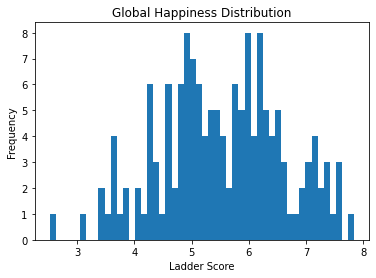

In [13]:
# Ladder score stats
print(df.ladder_score.describe())
plt.hist(data=df, x='ladder_score', bins=50)
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')
plt.title('Global Happiness Distribution');

#### Relatively normal distribution in happiness scores across all countries.

In [14]:
#Country with the lowest and highest ladder score
df.query('ladder_score == ladder_score.min() or ladder_score == ladder_score.max()')[['country_name','ladder_score']]

,country_name,ladder_score
0,Finland,7.842
148,Afghanistan,2.523


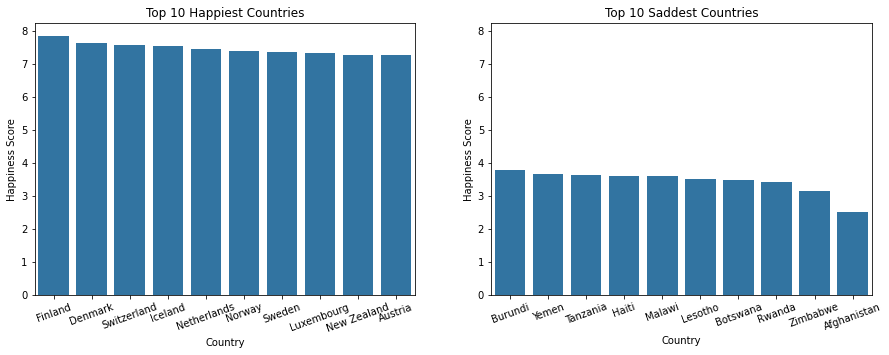

In [15]:
# Top 10 happiest and saddest countries
base_color = sns.color_palette()[0]
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.barplot(data=df,x='country_name',y='ladder_score',color=base_color)
plt.xlim(-0.5,9.5)
plt.xticks(rotation = 20)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')

plt.subplot(1,2,2)
sns.barplot(data=df,x='country_name',y='ladder_score',color=base_color)
plt.xlim(138.5,148.5)
plt.xticks(rotation = 20)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Saddest Countries');

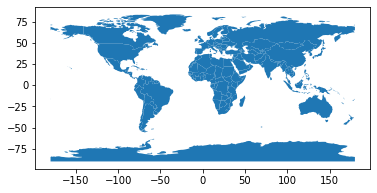

In [16]:
# Geospatial plot of global happiness
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
world.plot();

In [17]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [18]:
df.head()

,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [19]:
# Perform an outer merge (based on country name) of world data and happiness survey data and take a look at the tail end to
# see which survey country names didn't pair.
df_comb = pd.merge(world,df,how='outer',left_on='name',right_on='country_name')
df_comb[df_comb.isna().any(axis=1)].tail(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,...,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
175,1218208.0,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,13026129.0,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,None,Czech Republic,Central and Eastern Europe,6.965,0.049,...,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
178,NaN,NaN,NaN,NaN,NaN,None,United States,North America and ANZ,6.951,0.049,...,0.098,0.698,2.43,1.533,1.030,0.621,0.554,0.252,0.154,2.807
179,NaN,NaN,NaN,NaN,NaN,None,Bahrain,Middle East and North Africa,6.647,0.068,...,0.089,0.722,2.43,1.409,0.899,0.662,0.661,0.246,0.139,2.631
180,NaN,NaN,NaN,NaN,NaN,None,Malta,Western Europe,6.602,0.044,...,0.133,0.653,2.43,1.411,1.055,0.747,0.664,0.275,0.183,2.268
181,NaN,NaN,NaN,NaN,NaN,None,Taiwan Province of China,East Asia,6.584,0.038,...,-0.070,0.721,2.43,1.480,0.982,0.665,0.490,0.142,0.139,2.687
182,NaN,NaN,NaN,NaN,NaN,None,Singapore,Southeast Asia,6.377,0.043,...,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
183,NaN,NaN,NaN,NaN,NaN,None,Mauritius,Sub-Saharan Africa,6.049,0.059,...,-0.054,0.789,2.43,1.178,0.996,0.574,0.590,0.153,0.096,2.462
184,NaN,NaN,NaN,NaN,NaN,None,Bosnia and Herzegovina,Central and Eastern Europe,5.813,0.050,...,0.113,0.931,2.43,1.032,0.919,0.618,0.395,0.261,0.005,2.583


#### No pairing with our survey data for rows 177-194. Use fuzzywuzzy to see what our closest match is and see if same country.

In [20]:
for i in range(177,195):
    print(i, process.extract(df_comb.country_name[i],df_comb.name,scorer=fuzz.token_sort_ratio)[0], df_comb.country_name[i])

177 ('Czechia', 57, 153) Czech Republic
178 ('United States of America', 70, 4) United States
179 ('Brazil', 62, 29) Bahrain
180 ('Malawi', 73, 71) Malta
181 ('Costa Rica', 41, 34) Taiwan Province of China
182 ('Suriname', 59, 42) Singapore
183 ('Mauritania', 74, 53) Mauritius
184 ('Bosnia and Herz.', 81, 170) Bosnia and Herzegovina
185 ('Dominican Rep.', 84, 17) Dominican Republic
186 ('N. Cyprus', 80, 160) North Cyprus
187 ('Dem. Rep. Congo', 38, 11) Hong Kong S.A.R. of China
188 ('Brazil', 52, 29) Congo (Brazzaville)
189 ("Côte d'Ivoire", 61, 60) Ivory Coast
190 ('Mali', 67, 52) Maldives
191 ('Macedonia', 75, 171) North Macedonia
192 ('Palestine', 56, 79) Palestinian Territories
193 ('Somaliland', 74, 167) Swaziland
194 ('Morocco', 57, 162) Comoros


#### Looks like only 6 of our 18 are actually a match. Let's add to merged data and delete last 18 rows.

In [21]:
df_comb.iloc[153,8:] = df_comb.iloc[177,8:]
df_comb.iloc[4,8:] = df_comb.iloc[178,8:]
df_comb.iloc[170,8:] = df_comb.iloc[184,8:]
df_comb.iloc[17,8:] = df_comb.iloc[185,8:]
df_comb.iloc[160,8:] = df_comb.iloc[186,8:]
df_comb.iloc[60,8:] = df_comb.iloc[189,8:]
df_comb.dropna(axis=0,how='all',subset=['pop_est','continent','name','iso_a3','gdp_md_est'],inplace=True)

In [22]:
# Update default plot text sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

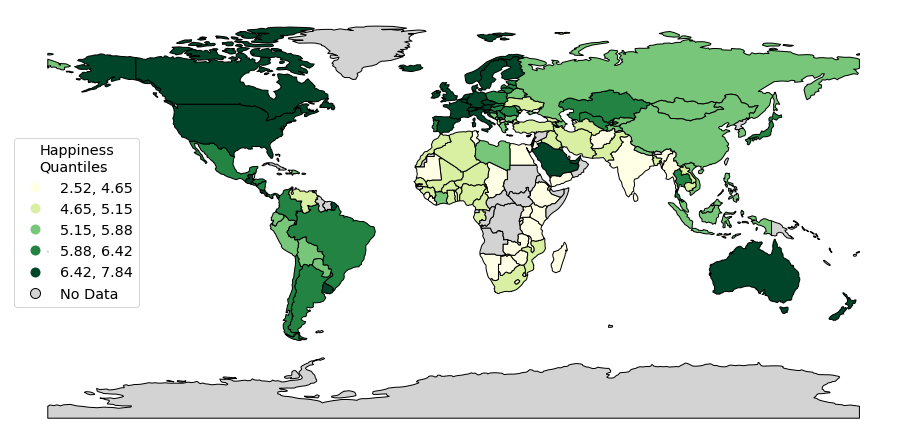

In [23]:
# Plot the happiness scores!
ax = df_comb.plot(column='ladder_score', scheme='quantiles', k=5, cmap='YlGn', 
             edgecolor='k', legend=True, figsize=[16,8], aspect='equal',
            legend_kwds={'title': 'Happiness\nQuantiles', 'loc': 'center left', 'title_fontsize': 'x-large'},
            missing_kwds={"color": "lightgrey","edgecolor": "black","label": "No Data"})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.set_axis_off()
plt.savefig('global_map_of_happiness.png',transparent = True,dpi=600);

                                    count      mean       std    min      25%  \
regional_indicator                                                              
Central and Eastern Europe           17.0  5.984765  0.493325  5.101  5.81300   
Commonwealth of Independent States   12.0  5.467000  0.438116  4.875  5.14475   
East Asia                             6.0  5.810333  0.439913  5.339  5.52700   
Latin America and Caribbean          20.0  5.908050  0.693467  3.615  5.75200   
Middle East and North Africa         17.0  5.219765  0.999259  3.658  4.58400   
North America and ANZ                 4.0  7.128500  0.138057  6.951  7.06500   
South Asia                            7.0  4.441857  0.993462  2.523  4.07200   
Southeast Asia                        9.0  5.407556  0.606271  4.426  5.03000   
Sub-Saharan Africa                   36.0  4.494472  0.654892  3.145  4.09850   
Western Europe                       21.0  6.914905  0.656519  5.536  6.49100   

                           

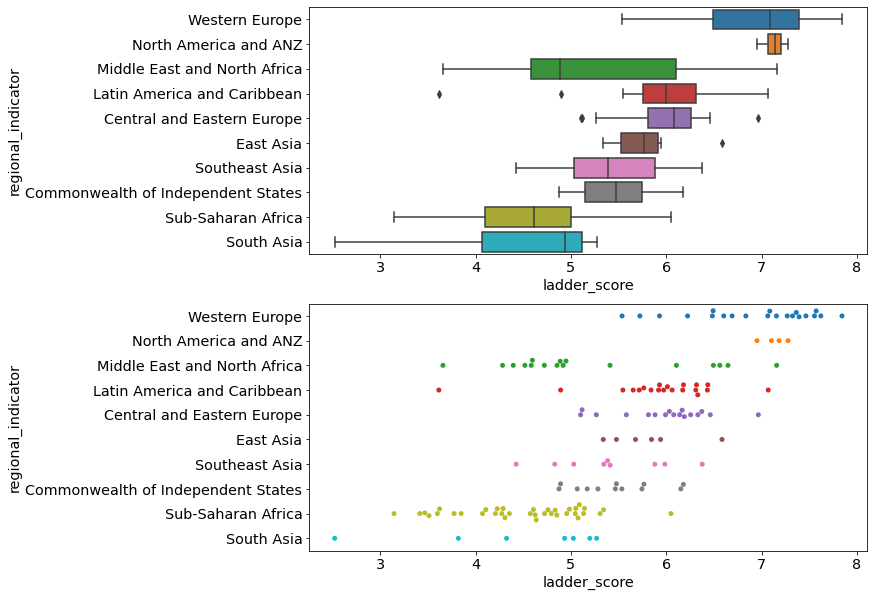

In [24]:
# Happiness per region
plt.figure(figsize=[10,10])
plt.subplot(2,1,1)
sns.boxplot(data=df, y='regional_indicator',x='ladder_score')
plt.subplot(2,1,2)
sns.swarmplot(data=df, y='regional_indicator',x='ladder_score')
print(df.groupby('regional_indicator').ladder_score.describe());

#### Clear regional correlation to happiness. North America/ANZ (Australia and New Zealand) and Western Europe are by far the happiest regions, both w/ median > 7. The other 8 defined regions median score range between ~4.5 to 6.

In [25]:
df.columns

Index(['country_name', 'regional_indicator', 'ladder_score',
       'standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker',
       'logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'ladder_score_in_dystopia',
       'explained_by_log_gdp_per_capita', 'explained_by_social_support',
       'explained_by_healthy_life_expectancy',
       'explained_by_freedom_to_make_life_choices', 'explained_by_generosity',
       'explained_by_perceptions_of_corruption', 'dystopia__residual'],
      dtype='object')

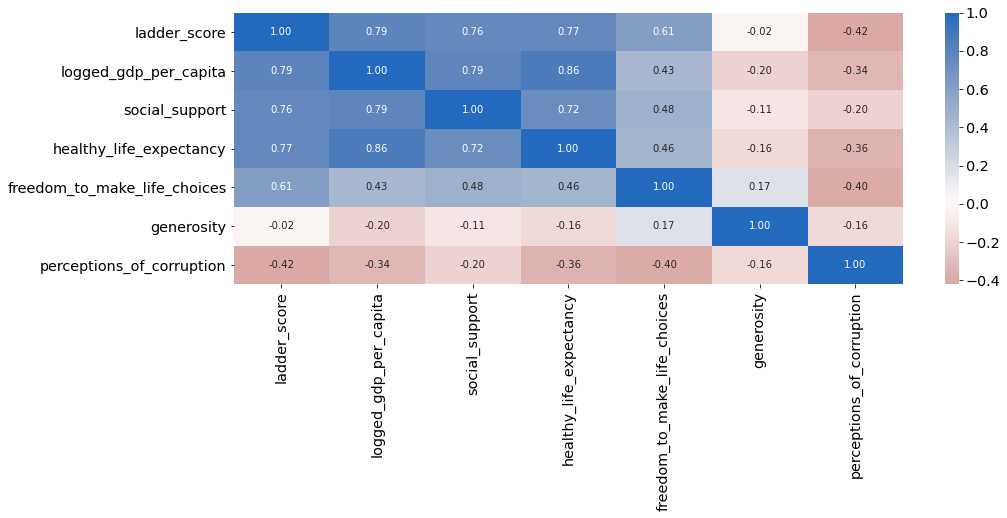

In [26]:
# Look at all correlations w/ happiness (focus on top row).
sns.heatmap(df[['ladder_score','logged_gdp_per_capita','social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity','perceptions_of_corruption']].corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0);

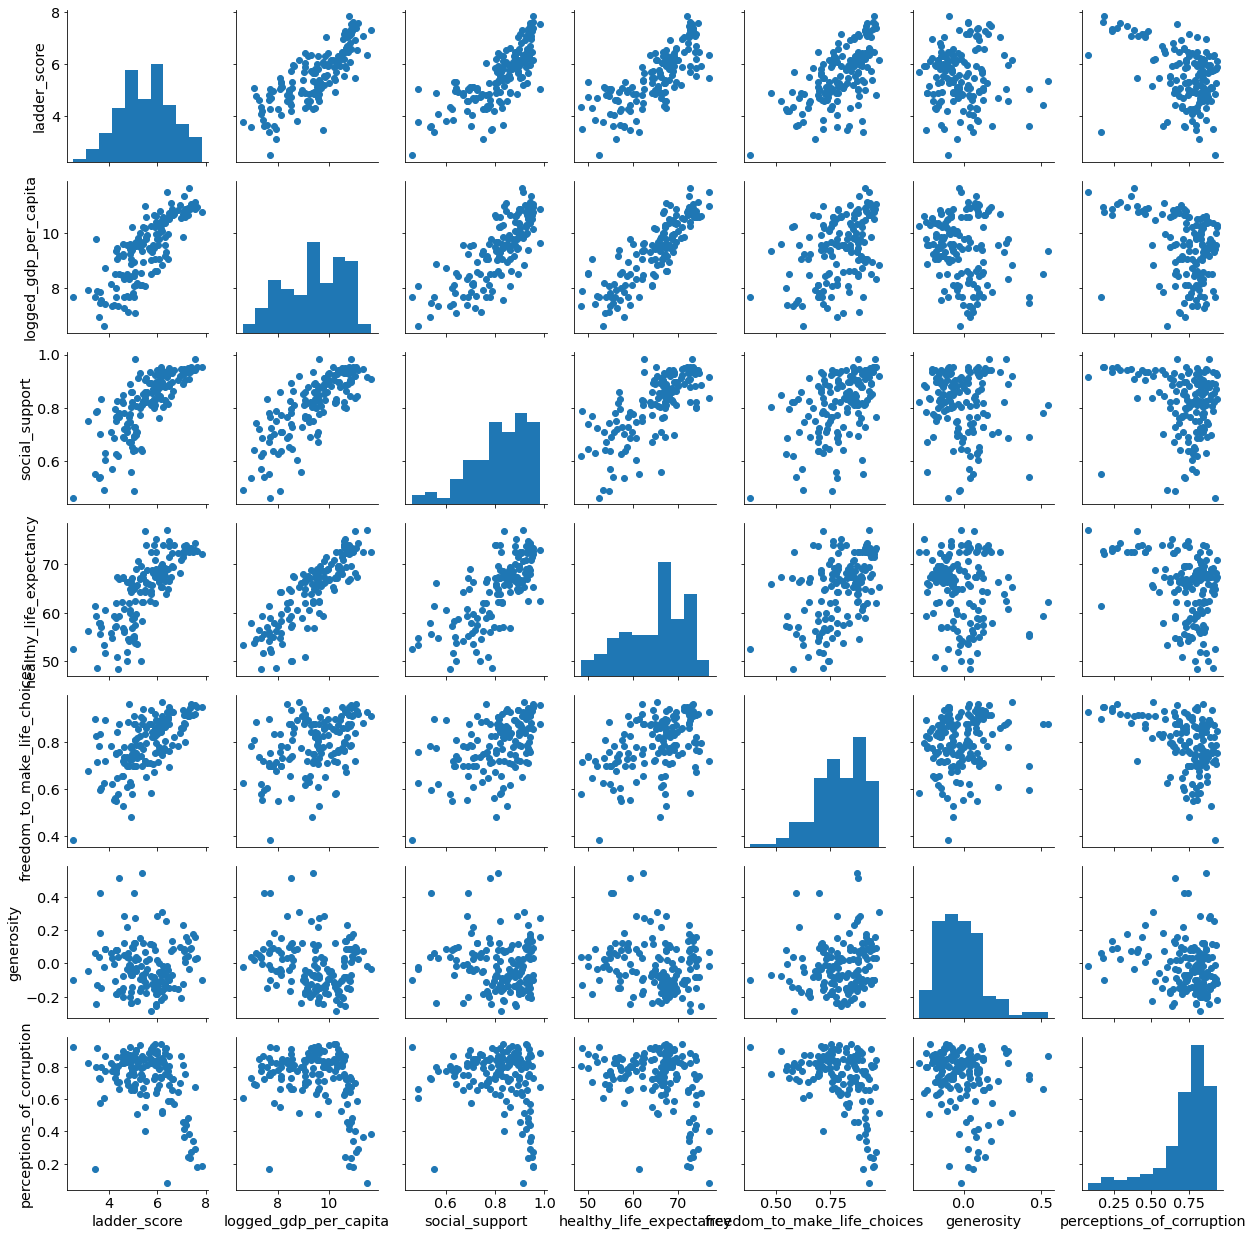

In [27]:
# Scatterplot matrix
g = sns.PairGrid(data=df, vars=['ladder_score','logged_gdp_per_capita','social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity','perceptions_of_corruption'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#### Focusing on the top row of the correlation heat map and scatterplot matrix we see that:
> GDP is most positively correlated (r=0.79), followed closely by healthy life expectancy (r=0.77) and social support (r=0.76). No surprises there.

> Negative correlation w/ perception of corruption.

> Generosity, basically w/ no correlation to happiness (r=-0.02). An unexpected result worth looking into a bit further.

In [28]:
df.sample()

,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
126,Jordan,Middle East and North Africa,4.395,0.062,4.516,4.273,9.182,0.767,67.0,0.755,-0.167,0.705,2.43,0.89,0.685,0.583,0.455,0.079,0.15,1.553


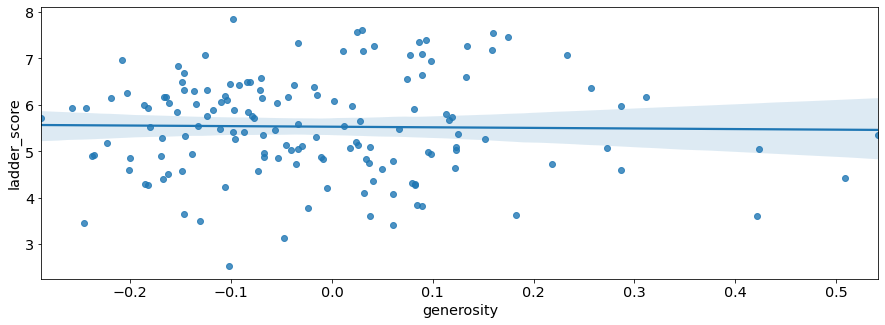

In [29]:
# Scatterplot of generosity v happiness color-coded by region
#g = sns.FacetGrid(data=df, hue='regional_indicator', height=5)
#g.map(plt.scatter, 'generosity', 'ladder_score')
#g.add_legend()
sns.regplot(data=df, x='generosity', y='ladder_score', fit_reg=True);

In [30]:
# Look at the four countries w/ generosity > 0.4
df.query('generosity > 0.4')

,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
81,Indonesia,Southeast Asia,5.345,0.056,5.454,5.235,9.365,0.811,62.236,0.873,0.542,0.867,2.43,0.954,0.786,0.433,0.598,0.541,0.046,1.987
97,Gambia,Sub-Saharan Africa,5.051,0.089,5.225,4.877,7.686,0.690,55.160,0.697,0.424,0.746,2.43,0.367,0.511,0.210,0.384,0.465,0.123,2.990
125,Myanmar,Southeast Asia,4.426,0.052,4.527,4.324,8.541,0.779,59.302,0.876,0.509,0.660,2.43,0.666,0.713,0.341,0.601,0.520,0.178,1.407
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060


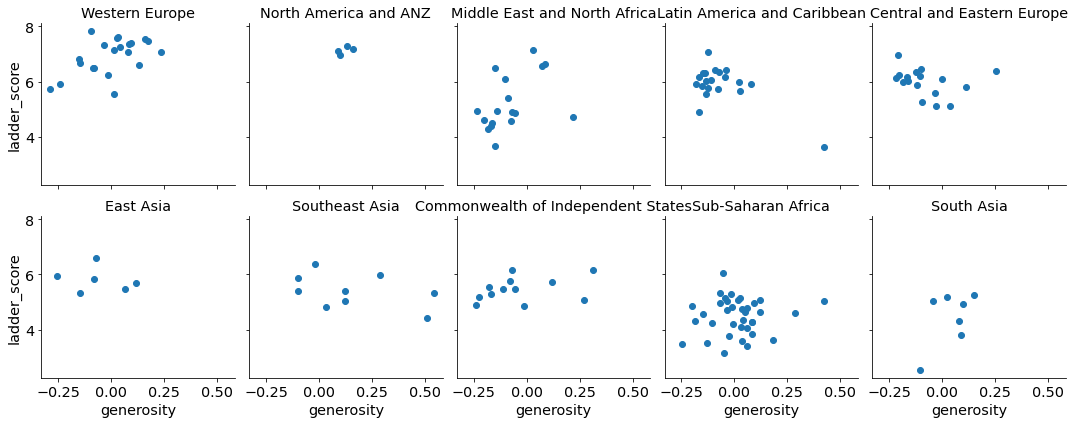

In [31]:
# Scatterplots of happiness v generosity plotted per region.
g=sns.FacetGrid(data=df,col='regional_indicator', margin_titles=True, col_wrap=5)
g.map(plt.scatter, 'generosity', 'ladder_score')
axes = g.axes.flatten()
for reg in range(0,10):
    df['regional_indicator'].unique()[reg]
    axes[reg].set_title(df['regional_indicator'].unique()[reg])

#### Next look at trends in time and specifically how COVID (2020) impacted global happiness.

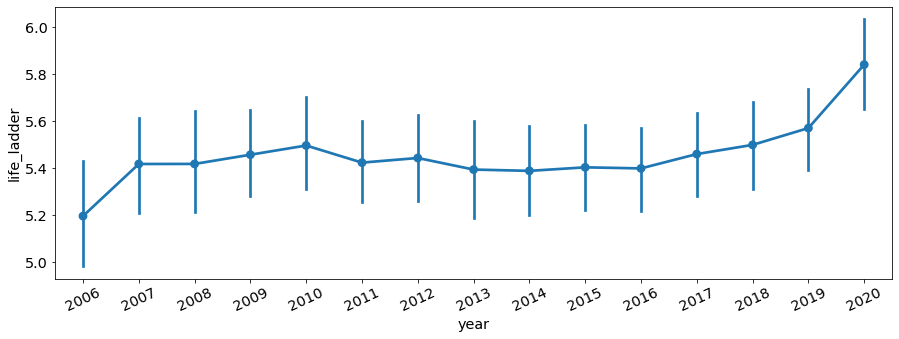

In [32]:
sns.pointplot(data=df_ts.query('year != 2005'), x='year', y='life_ladder')
plt.xticks(rotation = 25);

#### Well that is surprising. 2020 was happiest year to date (excluding 2005 data which included a much smaller country sample size) 

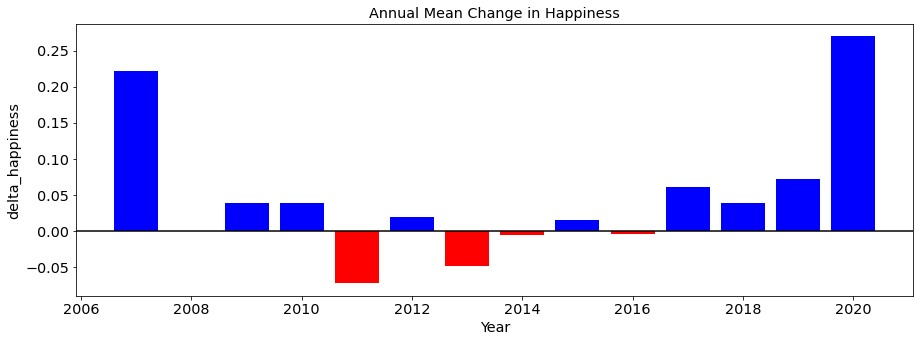

In [33]:
# Plot per year change in happiness
mean_happiness_per_year = df_ts.query('year != 2005').groupby('year').life_ladder.mean()
diff_per_year = mean_happiness_per_year.diff()

colors = np.where(diff_per_year<0, 'r', 'b')
plt.bar(x=mean_happiness_per_year.index,height=diff_per_year, color=colors)#, palette=sns.color_palette())
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Year')
plt.ylabel('delta_happiness')
plt.title('Annual Mean Change in Happiness');

#### While happiness has been trending upward since 2016, the increase from 2019-2020 is larger than for any other year to year change.

#### Let's investigate further... Assess just the change in happiness from 2019 to 2020.

In [34]:
# Create new df only including countries w/ happiness data available for both 2019 and 2020 and compute the difference.
df_temp1 = df_ts.query('year > 2018')
df_temp2 = df_ts.query('year > 2018').groupby('country_name')[['life_ladder']].diff()
df_temp2.rename(columns = {'life_ladder': 'ladder_diff'},inplace=True)
df_19_20 = pd.concat([df_temp1,df_temp2],axis=1)
df_19_20.dropna(axis=0,subset=['ladder_diff'],inplace=True)
df_19_20.ladder_diff.describe()

count    93.000000
mean     -0.008129
std       0.423688
min      -1.188000
25%      -0.203000
50%      -0.003000
75%       0.210000
max       1.531000
Name: ladder_diff, dtype: float64

#### Summary stats for happiness difference only between those countries w/ 2019 and 2020 data paints a different story. Only considering the 93 countries w/ data, the mean and median happiness difference now shows a decrease from 2019 to 2020.

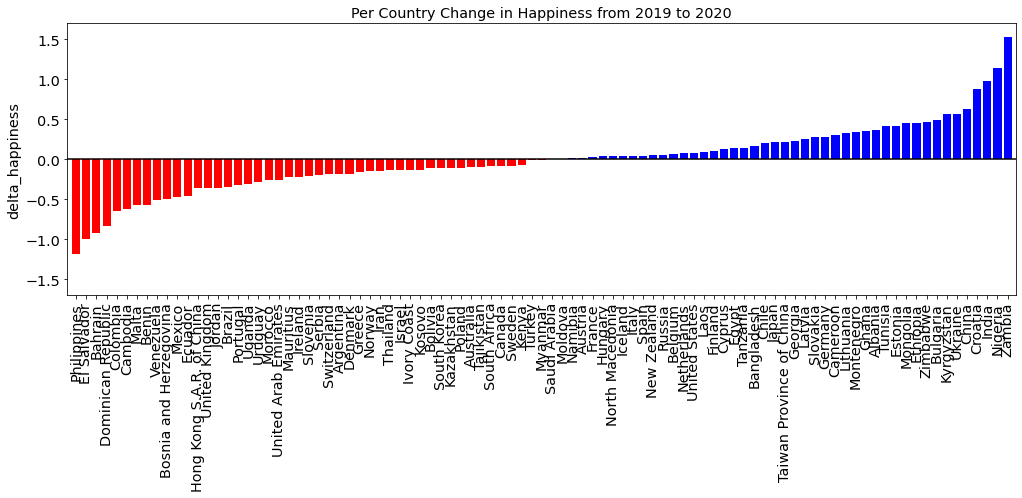

In [35]:
# Plot per country 2019-2020 happiness difference
colors = np.where(df_19_20.sort_values(by='ladder_diff',axis=0).ladder_diff<0, 'r', 'b')
plt.figure(figsize=[17,5])
plt.bar(data=df_19_20.sort_values(by='ladder_diff',axis=0),x='country_name',height='ladder_diff',color=colors)
plt.ylim(-1.7,1.7)
plt.xlim(-0.9,92.8)
plt.axhline(y=0, color='black', linestyle='-')
plt.xticks(rotation = 90)
plt.ylabel('delta_happiness')
plt.title('Per Country Change in Happiness from 2019 to 2020');

In [36]:
print(df_19_20.query('ladder_diff > 0').country_name.count())
print(df_19_20.query('ladder_diff == 0').country_name.count())
print(df_19_20.query('ladder_diff < 0').country_name.count())
print(df_19_20.query('ladder_diff < -1'))

45
0
48
     country_name  year  life_ladder  log_gdp_per_capita  social_support  \
1394  Philippines  2020         5.08               9.061           0.781   

      healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
1394                              62.1                         0.932   

      generosity  perceptions_of_corruption  positive_affect  negative_affect  \
1394      -0.116                      0.744            0.804            0.327   

      ladder_diff  
1394       -1.188  


In [37]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [38]:
# Plot it on a map
# Perform an outer merge (based on country name) of world data and df_19_20 and take a look at the tail end to
# see which survey country names didn't pair.
df_temp = df_19_20.copy()
df_comb2 = pd.merge(world,df_temp,how='outer',left_on='name',right_on='country_name')
df_comb2[df_comb2.isna().any(axis=1)].tail(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,ladder_diff
163,97041072.0,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",Egypt,2020.0,4.472,9.383,0.673,62.30,0.770,-0.112,NaN,0.599,0.442,0.144
164,6653210.0,Africa,Libya,LBY,90890.0,"POLYGON ((25.00000 22.00000, 25.00000 20.00304...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,865267.0,Africa,Djibouti,DJI,3345.0,"POLYGON ((42.35156 12.54223, 42.77964 12.45542...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,3500000.0,Africa,Somaliland,-99,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,11901484.0,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,3856181.0,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,2103721.0,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,1895250.0,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,2020.0,6.294,NaN,0.792,NaN,0.880,NaN,0.910,0.726,0.201,-0.131
175,1218208.0,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,13026129.0,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
for i in range(177,187):
    print(i, process.extract(df_comb2.country_name[i],df_comb2.name,scorer=fuzz.token_sort_ratio)[0], df_comb2.country_name[i])

177 ('Brazil', 62, 29) Bahrain
178 ('Bosnia and Herz.', 81, 170) Bosnia and Herzegovina
179 ('Dominican Rep.', 84, 17) Dominican Republic
180 ('Dem. Rep. Congo', 38, 11) Hong Kong S.A.R. of China
181 ("Côte d'Ivoire", 61, 60) Ivory Coast
182 ('Malawi', 73, 71) Malta
183 ('Mauritania', 74, 53) Mauritius
184 ('Macedonia', 75, 171) North Macedonia
185 ('Costa Rica', 41, 34) Taiwan Province of China
186 ('United States of America', 70, 4) United States


In [40]:
# Add those that we can.
df_comb2.iloc[170,8:] = df_comb2.iloc[178,8:]
df_comb2.iloc[17,8:] = df_comb2.iloc[179,8:]
df_comb2.iloc[60,8:] = df_comb2.iloc[181,8:]
df_comb2.iloc[4,8:] = df_comb2.iloc[186,8:]
df_comb2.dropna(axis=0,how='all',subset=['pop_est','continent','name','iso_a3','gdp_md_est'],inplace=True)

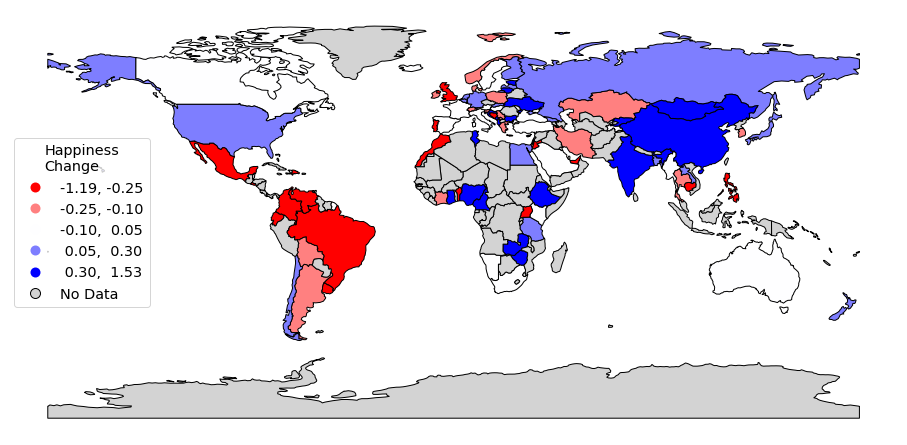

In [41]:
# Now plot it.
ax = df_comb2.plot(column='ladder_diff', scheme='quantiles', k=5, cmap='bwr_r', 
             edgecolor='k', legend=True, figsize=[16,8], aspect='equal',
            legend_kwds={'title': 'Happiness\nChange', 'loc': 'center left', 'title_fontsize': 'x-large'},
            missing_kwds={"color": "lightgrey","edgecolor": "black","label": "No Data"})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.set_axis_off()
plt.savefig('global_map_of_happiness_change_during_pandemic.png',transparent = True,dpi=600);

                                    count      mean       std    min      25%  \
regional_indicator                                                              
Central and Eastern Europe           15.0  0.153267  0.348662 -0.500 -0.11700   
Commonwealth of Independent States    7.0  0.176000  0.288811 -0.104 -0.04100   
East Asia                             6.0  0.170833  0.361447 -0.364 -0.03000   
Latin America and Caribbean          11.0 -0.420182  0.335910 -0.993 -0.57400   
Middle East and North Africa         10.0 -0.152000  0.351905 -0.925 -0.25375   
North America and ANZ                 4.0 -0.011250  0.092590 -0.097 -0.08725   
South Asia                            2.0  0.571000  0.572756  0.166  0.36850   
Southeast Asia                        5.0 -0.372400  0.531489 -1.188 -0.62100   
Sub-Saharan Africa                   14.0  0.215286  0.566122 -0.568 -0.12325   
Western Europe                       19.0 -0.074684  0.204716 -0.576 -0.18200   

                           

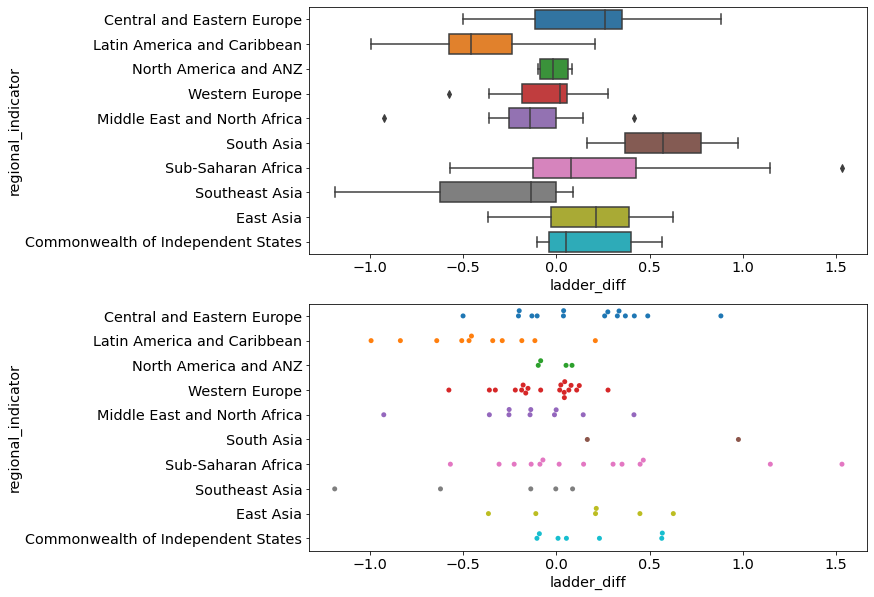

In [42]:
# Happiness 2019-2020 difference per region
df_19_20 = pd.merge(df_19_20, df[['country_name','regional_indicator']], how='left', left_on='country_name', right_on='country_name')
plt.figure(figsize=[10,10])
plt.subplot(2,1,1)
sns.boxplot(data=df_19_20, y='regional_indicator',x='ladder_diff')
plt.subplot(2,1,2)
sns.swarmplot(data=df_19_20, y='regional_indicator',x='ladder_diff')
print(df_19_20.groupby('regional_indicator').ladder_diff.describe());

In [43]:
df.regional_indicator.value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: regional_indicator, dtype: int64

#### Looks like happiness impacts from the pandemic varied across the different regions. Latin America & Caribbean and Southeast Asia saw the largest drops in happiness, while South Asia (2 countries) had the largest increase.

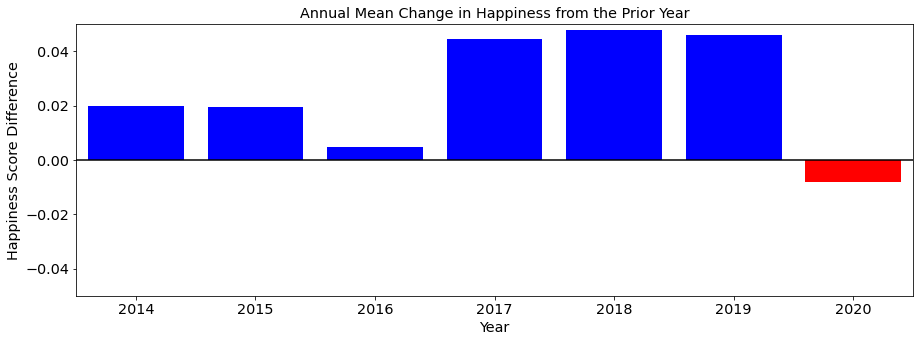

In [44]:
# Plot mean happiness per year only for our 93 country subset containing 2019 and 2020 data
cntry_lst = df_19_20.country_name.unique()

mean_happiness_per_year_sub = df_ts.query('year != 2005 and country_name in @cntry_lst').groupby('year').life_ladder.mean()
diff_per_year_sub = mean_happiness_per_year_sub.diff()

colors = np.where(diff_per_year_sub<0, 'r', 'b')
plt.bar(x=mean_happiness_per_year_sub.index,height=diff_per_year_sub, color=colors)#, palette=sns.color_palette())
#plt.xticks(rotation = 25)
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Happiness Score Difference')
plt.title('Annual Mean Change in Happiness from the Prior Year')
plt.xlim(2013.5,2020.5)
plt.ylim(-0.05,0.05)
plt.savefig('annual_change_in_happiness_2014_2020.png',transparent = True,dpi=600);


In [45]:
mean_happiness_per_year_sub

year
2006    5.438302
2007    5.544696
2008    5.766638
2009    5.643528
2010    5.745266
2011    5.741612
2012    5.735844
2013    5.666345
2014    5.686236
2015    5.705618
2016    5.710429
2017    5.754903
2018    5.802600
2019    5.848720
2020    5.840591
Name: life_ladder, dtype: float64

#### The above barplot is a little more in line w/ expectations. Increasing happiness each year from 2014-2019 and then a decrease, which is surely heavily attributable to the pandemic.

## Is there statistical significance in the difference in happiness sample means between 2019 and 2020?
> Taking the difference between means and creating confidence intervals from the sampling distributions can be used to determine if the differences are occurring due to randomness associated with the chosen samples or if they are in fact statistically different.

> We'll use hypothesis testing and bootstrapping to determine if there is significance in the difference in sample means for happiness in 2019 and 2020

In [46]:
# Null hypothesis (H0): Happiness in 2019 is the same or lower than happiness in 2020. h2019 - h2020 <= 0
# Alternative hypothesis (H1): Happiness in 2019 is greater than happiness in 2020. h2019 - h2020 > 0

# To determine which hypothesis we think is true, I'll simulate what we believe to
# be possible under the null and see if our data are consistent with that. I'll do this by:
    # 1) Bootstrapping the sample to simulate the sampling distribution for the difference 2020 to 2019 happiness.
    # 2) Simulate the distribution under the null hypothesis by creating a normal distribution centered at 0
    # 3) Plot histogram of the null distribution
    # 4) Append vertical line o fthe observed statistic, i.e., happiness difference between 2019 and 20
    # 5) Compute the p-value for our statistic (the observed difference in proportions)
    # 6) If the p-value is less than our determined acceptable rate of having a type 1 error (saying 2020 is less
    #    happy when in fact it isn't), then we reject the null hypothesis.

In [47]:
df_19_20.sample()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,ladder_diff,regional_indicator
14,Canada,2020,7.025,10.73,0.931,74.0,0.887,0.05,0.434,0.796,0.307,-0.084,North America and ANZ


In [48]:
df_temp1.head(5)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891,0.679,0.265
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319


In [49]:
# Create a dataframe w/ columns for country, 2019 ladder score, and 2020 ladder score
df_piv = df_temp1.pivot(index='country_name', columns='year', values='life_ladder').reset_index()
df_piv.rename(columns={2019:'y2019',2020:'y2020'},inplace=True)
df_piv.dropna(axis=0,how='any',subset=['y2019','y2020'],inplace=True)
print(df_piv.shape)
df_piv.head()

(93, 3)


year,country_name,y2019,y2020
1,Albania,4.995,5.365
3,Argentina,6.086,5.901
5,Australia,7.234,7.137
6,Austria,7.195,7.213
8,Bahrain,7.098,6.173


In [50]:
# Average happiness for 2019
h19_mean = df_piv.y2019.mean()
# Average happiness for 2020
h20_mean = df_piv.y2020.mean()
h19_mean, h20_mean

(5.848720430107526, 5.840591397849461)

In [51]:
# Compute the observed difference in happiness
obs_diff = h19_mean - h20_mean
obs_diff

0.008129032258064939

In [52]:
# With bootstrapping, create sampling distribution of difference in average happiness from the two years
diffs = []
for _ in range(10000):
    boot_s = df_piv.sample(df_piv.shape[0], replace=True)
    mean19 = boot_s.y2019.mean()
    mean20 = boot_s.y2020.mean()
    diffs.append(mean19 - mean20)

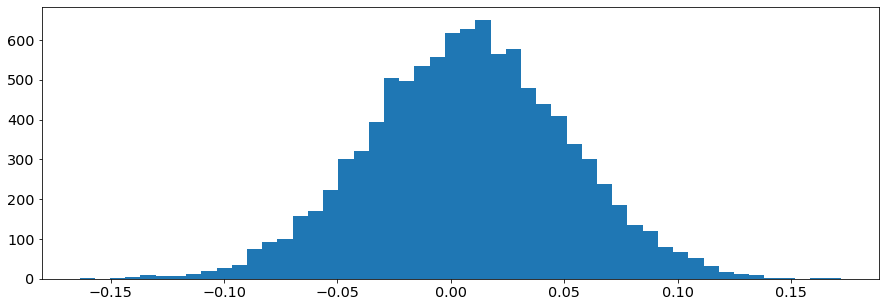

In [53]:
# Convert to numpy array
diffs = np.array(diffs)
# Plot the sampling distribution
plt.hist(diffs,bins=50);

In [54]:
# Simulate the distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

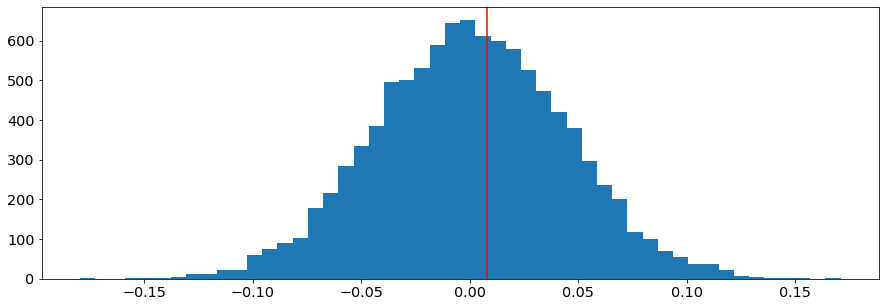

In [55]:
# Plot the null distribution
plt.hist(null_vals,bins=50)

# Add a vertical line for the observed statistic
plt.axvline(x=obs_diff, color='r');

In [56]:
# Compute p-value
p_val = (null_vals > obs_diff).mean()
p_val

0.4288

##### A p-value less than 0.05 tells us that we have evidence, with a type I error rate of 0.05, that the 93 countries are less happy in 2020 as compared to 2020. Our p-value (0.425) indicates we do not reject the null.
#### Happiness in 2019 is not different than that in 2020. Seems we are overall pretty resilient (our moods, not our immune system) to COVID-19.

## Let's use supervised machine learning and build a simple model to predict happiness using the survey parameters

In [57]:
# importing scikit, i.e., sklearn, for some supervised machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
df.head()

,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [59]:
#Only use quant variables (i.e., no locational variables)
num_vars = df[['ladder_score', 'logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]

#Split into explanatory and response variables
X = num_vars[['logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]
y = num_vars['ladder_score']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.6735746331507253 on 45 values.'

#### Model's r2 = 0.67. Not too shabby. Let's add the regional parameter to the model

In [60]:
# Create a new explantory df w/ dummy categorical variables for the 10 regions
X2 = pd.concat([X, pd.get_dummies(df['regional_indicator'])], axis=1)
X2.head()

,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
0,10.775,0.954,72.0,0.949,-0.098,0.186,0,0,0,0,0,0,0,0,0,1
1,10.933,0.954,72.7,0.946,0.030,0.179,0,0,0,0,0,0,0,0,0,1
2,11.117,0.942,74.4,0.919,0.025,0.292,0,0,0,0,0,0,0,0,0,1
3,10.878,0.983,73.0,0.955,0.160,0.673,0,0,0,0,0,0,0,0,0,1
4,10.932,0.942,72.4,0.913,0.175,0.338,0,0,0,0,0,0,0,0,0,1


In [61]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.7617686158225301 on 45 values.'

#### Adding the regional parameter to the model improved the r2 to 0.76.

<a id='conclusions'></a>
## Conclusions

#### The results of our analysis:
1. What countries/regions are happiest? **The Scandinavian and Northwestern European countries are the happiest in the world. Finland, Denmark, and Switzerland make out the top three.**
2. What parameters correlate most positively/negatively with happiness? **Not too surprisingly, a country's wealth and healthy life expectancy are the top factors in happiness, whereas sense of corruption most negatively impacts happiness. Somewhat surprisingly, generosity doesn't appear to be a positive influence on one's happiness.**
3. How'd COVID impact happiness around the world? **Of the sub-sample of 93 countries investigated, while the mean happiness score did decrease slightly, there was no statistical significance in this difference. It appears us humans are overall pretty resilient (our moods, not our immune system) to life-altering global pandemics.**
4. Can we build a model that predicts happiness using supervised ML? **We were able to build a pretty successful simple linear model to predict happiness based on 7 parameters. Our model's r2 = 0.76.**